# Modeling Transit Time Distributions of Microvascular Networks: Data Generation

Nathan Karst and John Geddes

In [1]:
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
import pickle

import skeleton
from network import *
from ttd import *

## Data Generation

In [9]:
seed = 2023
pPlasma = 2
delta = 3.5
h_in = 0.45

### Fully Random Voronoi

In [10]:
S = skeleton.PeriodicRandomSkeleton(35,seed)

# set inlet pressures to 1 at all top nodes; pressures at outlets will be 0
inlets = np.where(S.v[:,1] == np.max(S.v[:,1]))[0]
p_bc = np.zeros(len(S.v[:,0]))
p_bc[inlets] = 1


h_bc = np.zeros(len(S.e))
for j,edge in enumerate(S.e):
    if set(inlets).intersection(set(edge)):
        h_bc[j] = h_in 

physParams = {'pPlasma':pPlasma, 'delta':delta, 'h_bcs':h_bc, 'seed':seed,'pq_bcs':p_bc,'bc':'pressure'}
params = {**S.get(), **physParams}  
N = Network(params)

(-0.1, 1.1)

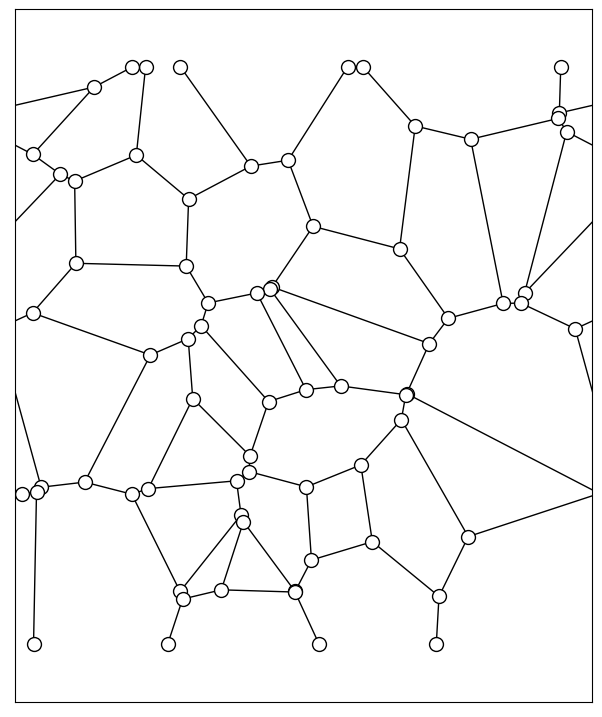

In [11]:
plt.figure(figsize=(9,9))
N.plot(annotate=False)
plt.ylim((-.1,1.1))

In [12]:
N.find_equilibria(1000,tol=1e-3)

N.save(f'voronoi_1000')

/Users/nathankarst/Dropbox/Research/Blood flow/2021_transit_time/skimming.py:49: RuntimeWarning: overflow encountered in double_scalars
  f = q**(p-1)/(q**p + (1-q)**p)
/Users/nathankarst/Dropbox/Research/Blood flow/2021_transit_time/skimming.py:50: RuntimeWarning: overflow encountered in double_scalars
  g = (1-q)**(p-1)/(q**p + (1-q)**p)


### Honeycomb

In [71]:
seed = 2023
suffix = 'regular' # change this to 'perturbed' to generate data for second network type
m = 6
n = m

In [72]:
if suffix == 'perturbed':
    pert = 0.3
else: 
    pert = 0
S = skeleton.PeriodicHoneycombSkeleton(m,n,pert,seed)

# find inlets (here, top of the network) so we can specify BCs
inlets = np.where(S.v[:,1] == np.max(S.v[:,1]))[0]

# set inlet pressures to 1 at all top nodes; pressures at outlets will be 0
p_bc = np.zeros(len(S.v[:,0]))
p_bc[inlets] = 1

# set inlet hematocrit in all inlet vessels
h_bc = np.zeros(len(S.e))
for i,edge in enumerate(S.e):
    if set(inlets).intersection(set(edge)):
        h_bc[i] = h_in
        
if suffix == 'perturbed':    
    np.random.seed(seed)
    diameter_deviation = 1e-1
    S.d += np.random.uniform(-diameter_deviation, diameter_deviation)


# create construction dictionary for Network object
physParams = {'pPlasma':pPlasma, 'delta':delta, 'seed':seed, 
              'bc':'pressure','pq_bcs':p_bc,
              'h_bcs':h_bc}
params = {**S.get(), **physParams}

N = Network(params)

In [ ]:
neq = 1000
N.find_equilibria(n=neq,verbose=True,tol=1e-4)

1: |F(x*)| = 5.8e-05
2: |F(x*)| = 7.3e-05
3: |F(x*)| = 3e-06
4: |F(x*)| = 3.6e-05
5: |F(x*)| = 7.3e-05
6: |F(x*)| = 9.5e-05
7: |F(x*)| = 7.6e-05
8: |F(x*)| = 9.6e-05
9: |F(x*)| = 8e-05
10: |F(x*)| = 5.8e-05
11: |F(x*)| = 7.8e-05
12: |F(x*)| = 1e-06
13: |F(x*)| = 5.8e-05
14: |F(x*)| = 7.2e-05
15: |F(x*)| = 8e-05
16: |F(x*)| = 5.1e-05
17: |F(x*)| = 9.6e-05
18: |F(x*)| = 3.7e-05
19: |F(x*)| = 7.6e-05
20: |F(x*)| = 8.3e-05
21: |F(x*)| = 8.9e-05
22: |F(x*)| = 7.8e-05
23: |F(x*)| = 3.3e-05
24: |F(x*)| = 6.7e-05
25: |F(x*)| = 4.1e-05
26: |F(x*)| = 6.2e-05
27: |F(x*)| = 5.9e-05
28: |F(x*)| = 5e-06
29: |F(x*)| = 0.0
30: |F(x*)| = 8.6e-05
31: |F(x*)| = 8.1e-05
32: |F(x*)| = 4e-06
33: |F(x*)| = 4.4e-05
34: |F(x*)| = 7e-06
35: |F(x*)| = 4.1e-05
36: |F(x*)| = 8.5e-05
37: |F(x*)| = 5.8e-05
38: |F(x*)| = 3.8e-05
39: |F(x*)| = 5.3e-05
40: |F(x*)| = 9.6e-05
41: |F(x*)| = 8.9e-05
42: |F(x*)| = 4.2e-05
43: |F(x*)| = 6.7e-05
44: |F(x*)| = 9.1e-05
45: |F(x*)| = 8.2e-05
46: |F(x*)| = 5.7e-05
47: |F(x*)| = 4

/Users/nathankarst/Dropbox/Research/Blood flow/2021_transit_time/skimming.py:49: RuntimeWarning: overflow encountered in double_scalars
  f = q**(p-1)/(q**p + (1-q)**p)
/Users/nathankarst/Dropbox/Research/Blood flow/2021_transit_time/skimming.py:50: RuntimeWarning: overflow encountered in double_scalars
  g = (1-q)**(p-1)/(q**p + (1-q)**p)


304: |F(x*)| = 4.4e-05
305: |F(x*)| = 9.3e-05
306: |F(x*)| = 9e-05
307: |F(x*)| = 9.6e-05
308: |F(x*)| = 6e-05
309: |F(x*)| = 2.3e-05
310: |F(x*)| = 9.6e-05
311: |F(x*)| = 8.7e-05
312: |F(x*)| = 8.5e-05
313: |F(x*)| = 9.4e-05
314: |F(x*)| = 1.6e-05
315: |F(x*)| = 0.0
316: |F(x*)| = 9.5e-05
317: |F(x*)| = 0.0001
318: |F(x*)| = 6.7e-05
319: |F(x*)| = 6.7e-05
320: |F(x*)| = 4.1e-05
321: |F(x*)| = 8.6e-05
322: |F(x*)| = 6.7e-05
323: |F(x*)| = 7e-05
324: |F(x*)| = 7.8e-05
325: |F(x*)| = 3.6e-05
326: |F(x*)| = 6.4e-05
327: |F(x*)| = 7.1e-05
328: |F(x*)| = 8.4e-05
329: |F(x*)| = 7.8e-05
330: |F(x*)| = 2.3e-05
331: |F(x*)| = 1.6e-05
332: |F(x*)| = 2e-05
333: |F(x*)| = 5.6e-05
334: |F(x*)| = 9.7e-05
335: |F(x*)| = 8.7e-05
336: |F(x*)| = 7.4e-05
337: |F(x*)| = 8.5e-05
338: |F(x*)| = 8.5e-05
339: |F(x*)| = 6.1e-05
340: |F(x*)| = 8.4e-05
341: |F(x*)| = 0.0
342: |F(x*)| = 9.3e-05
343: |F(x*)| = 9.2e-05
344: |F(x*)| = 1.9e-05
345: |F(x*)| = 7e-05
346: |F(x*)| = 9.4e-05
347: |F(x*)| = 6.6e-05
348: |F

665: |F(x*)| = 3.6e-05
666: |F(x*)| = 3.5e-05
667: |F(x*)| = 2.1e-05
668: |F(x*)| = 2.7e-05
669: |F(x*)| = 5.1e-05
670: |F(x*)| = 8.1e-05
671: |F(x*)| = 5e-06
672: |F(x*)| = 1.1e-05
673: |F(x*)| = 7.6e-05
674: |F(x*)| = 9.8e-05
675: |F(x*)| = 3.3e-05
676: |F(x*)| = 6.1e-05
677: |F(x*)| = 2.2e-05
678: |F(x*)| = 8.6e-05
679: |F(x*)| = 9.9e-05
680: |F(x*)| = 6e-05
681: |F(x*)| = 5.1e-05
682: |F(x*)| = 0.0
683: |F(x*)| = 1.2e-05
684: |F(x*)| = 5.3e-05
685: |F(x*)| = 1e-05
686: |F(x*)| = 7.9e-05
687: |F(x*)| = 2.3e-05
688: |F(x*)| = 4.8e-05
689: |F(x*)| = 0.0001
690: |F(x*)| = 9.2e-05
691: |F(x*)| = 9e-05
692: |F(x*)| = 9e-05
693: |F(x*)| = 4.2e-05
694: |F(x*)| = 9.1e-05
695: |F(x*)| = 7e-05
696: |F(x*)| = 0.0
697: |F(x*)| = 1.9e-05
698: |F(x*)| = 8.7e-05
699: |F(x*)| = 5.4e-05
700: |F(x*)| = 7.8e-05
701: |F(x*)| = 8.6e-05
702: |F(x*)| = 8.1e-05
703: |F(x*)| = 5.2e-05
704: |F(x*)| = 3.5e-05
705: |F(x*)| = 7.4e-05
706: |F(x*)| = 9.2e-05
707: |F(x*)| = 6.4e-05
708: |F(x*)| = 5.5e-05
709: |F(x

In [ ]:
N.save(f'nm_{n}_neq_{neq}_{suffix}')